In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import os 
from pathlib import Path
from wordcloud import WordCloud


In [2]:
from utils import *

# **Dataset 1: Software Engineer Salaries**

In [ ]:
#Carga del dataset
df1 = pd.read_csv(r'C:\Users\daine\Downloads\Proyecto\datasets\Software Engineer Salaries.csv')
#descargarlo desde https://www.kaggle.com/datasets/emreksz/software-engineer-jobs-and-salaries-2024

In [ ]:
#revision del dataset
print(df1.info())

In [ ]:
print(df1.describe())

In [ ]:
df1.head(5)

In [ ]:
df1=extraer_salarios(df1,"salary")

In [ ]:
# Identificar duplicados en todas las columnas
duplicados = df1.duplicated()

# Mostrar las filas duplicadas
print(df1[duplicados])

# Contar el número total de duplicados
print(f"Total duplicados: {duplicados.sum()}")

In [ ]:
categorical_columns = ['Job Title', 'Location']
for col in categorical_columns:
    plot_top_n_categories(df1, col, n=20)

In [ ]:
df1['job_simp'] = df1['Job Title'].apply(title_simplifier)
df1.job_simp.value_counts()

# **Dataset 2: Data Science Job listing**

In [ ]:
#Carga del dataset
df2 = pd.read_csv(r'/content/Data-Science-Job_Listing.csv')
#descargarlo desde https://www.kaggle.com/datasets/ritiksharma07/data-science-job-listings-from-glassdoor

In [ ]:
#revision del dataset
print(df2.info())

In [ ]:
print(df2.describe())

In [ ]:
df2.head(20)

In [ ]:
#reviso las columnas categoricas
categorical_columns = ['Job Title', 'Location']
for col in categorical_columns:
    plot_top_n_categories(df2, col, n=20)

In [ ]:
df2['job_simp'] = df2['Job Title'].apply(title_simplifier)
df2.job_simp.value_counts()

In [ ]:
df2['Company Name'] = df2['Company Name'].str.replace('\n',' ')

In [ ]:
df2=extraer_salarios(df2,"Salary")

In [ ]:
# Aplicar la función al DataFrame
df2['key_info'] = df2['description'].apply(extract_key_info)

# Descomponer la columna de información clave en columnas separadas
df2['skills'] = df2['key_info'].apply(lambda x: x['skills'])
df2['responsibilities'] = df2['key_info'].apply(lambda x: x['responsibilities'])
df2['requirements'] = df2['key_info'].apply(lambda x: x['requirements'])

# Eliminar la columna temporal
df2= df2.drop(columns=['key_info'])

# Aplicar la limpieza a la columna de skills
df2['cleaned_skills'] = df2['skills'].apply(clean_skills)

# **Dataset 3: Glassdoor Salary Cleaned Version**

In [ ]:
#Carga del dataset
df3 = pd.read_csv(r'C:\Users\daine\Downloads\Proyecto\datasets\Glassdoor_Salary_Cleaned_Version.csv')
#descargarlo desde https://www.kaggle.com/datasets/fahadrehman07/data-science-jobs-and-salary-glassdoor/data

In [ ]:
#revision del dataset
print(df3.info())

In [ ]:
print(df3.describe())

In [ ]:
df3.head(5)

In [ ]:
df3 = df3.drop(['min_salary', 'max_salary','avg_salary','company_txt','age','python_yn','R_yn','spark','aws','excel'], axis=1)

In [ ]:
# Identificar duplicados en todas las columnas
duplicados = df3.duplicated()

# Mostrar las filas duplicadas
print(df3[duplicados])

# Contar el número total de duplicados
print(f"Total duplicados: {duplicados.sum()}")

In [ ]:
categorical_columns = ['Job Title', 'Location', 'Type of ownership', 'Industry', 'Sector']
for col in categorical_columns:
    plot_top_n_categories(df3, col, n=20)

In [ ]:
df3['job_simp'] = df3['Job Title'].apply(title_simplifier)
df3.job_simp.value_counts()

In [ ]:
df3['Company Name'] = df3['Company Name'].str.split('\n').str[0]

In [ ]:
df3=extraer_salarios(df3,"Salary Estimate")

In [ ]:
df3.head(5)

# **Dataset 4: Cleaned Dataset Canada**

In [3]:
# Carga del dataset
df4 = pd.read_csv(r'/Users/samanthaestudillo/Documents/No Country/c20-67/c20-67-m-data-bi/ETL_EDA/datasets/Cleaned_Dataset_Canada.csv')
df4.head()

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000


In [4]:
# Estandarizar nombres de columnas 
df4 = clean_column_names(df4)
df4.info()

# Modificar texto en columnas
df4 = capitalize_column(df4, 'employer')
df4 = capitalize_column(df4, 'job_info')

# Corregir errores de codificación
df4['city'] = df4['city'].replace('MontrÃƒÂ©al','Montreal')

replacements = {
    'Ã¢Â‚¬Â€Œ': '-',  
    'Ãƒâ¢Ã¢Â€Šâ¬Ã¢Â‚¬Å“':'–',
    'Ãƒâ¢Ã¢Â€Šâ¬Ã¢Â‚¬':'–',
    'Ãƒâ':'',
    'Sãƒâ©Nior': 'Sénior',
    'Spãƒâ©Cialisãƒâ©': 'Spécialisé',
    'Cybersãƒâ©Curitãƒâ©': 'Cybersécurité',
    'Dã¢Â‚¬Â„¢éTudes': 'D’études',
    'Kãƒâ¶Rber': 'Körber',
    'Donnãƒæ’Ã‚Â©Es': 'Données',
    'Chaãƒâ®Ne': 'Chaîne',
    'Systãƒâ¨Mes': 'Systèmes',
    'Ãƒæ’Ã‚Â\xa0': 'À',
    'Sãƒæ’Ã‚Â©Nior': 'Sénior',
    'Chaãƒæ’Ã‚Â®Ne': 'Chaîne',
    'Ãƒæ’Ã‚Â©Conomique': 'Économique'   
}

df4['job_info'] = df4['job_info'].replace(replacements, regex=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_title      1796 non-null   object 
 1   job_info       1796 non-null   object 
 2   position       1796 non-null   object 
 3   employer       1796 non-null   object 
 4   city           1796 non-null   object 
 5   province       1796 non-null   object 
 6   skill          1796 non-null   object 
 7   seniority      1796 non-null   object 
 8   work_type      1796 non-null   object 
 9   industry_type  1796 non-null   object 
 10  min_salary     1796 non-null   float64
 11  max_salary     1796 non-null   float64
 12  avg_salary     1796 non-null   float64
dtypes: float64(3), object(10)
memory usage: 182.5+ KB


In [5]:
# Verificar valores nulos y duplicados
df4_ndr = null_duplicates_review(df4, 'Cleaned Dataset Canada')

Valores ausentes en Cleaned Dataset Canada:
               Valores ausentes (%)
job_title                       0.0
job_info                        0.0
position                        0.0
employer                        0.0
city                            0.0
province                        0.0
skill                           0.0
seniority                       0.0
work_type                       0.0
industry_type                   0.0
min_salary                      0.0
max_salary                      0.0
avg_salary                      0.0

Total duplicados en Cleaned Dataset Canada: 143



In [6]:
# Identificar duplicados
duplicates = df4[df4.duplicated(keep=False)]
duplicates

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
9,Senior Supply Chain Data Analysts,Opgt Mod - One (1) Business Analyst - Senior,Business Analyst,Softline Technology,Toronto,ON,"Sql, Gap, Power BI",Senior,In-Person,Technology,68500.0,87000.0,77750.0
10,Senior Supply Chain Data Analysts,Opgt Mod - One (1) Business Analyst - Senior,Business Analyst,Softline Technology,Toronto,ON,"Sql, Gap, Power BI",Senior,In-Person,Technology,68500.0,87000.0,77750.0
11,Senior Supply Chain Data Analysts,Opgt Mod - One (1) Business Analyst - Senior,Business Analyst,Softline Technology,Toronto,ON,"Sql, Gap, Power BI",Senior,In-Person,Technology,68500.0,87000.0,77750.0
27,Business and Marketing Analysts,Business Analyst,Business Analyst,Banff Caribou Properties Ltd.,Banff,AB,Sql,ANY,In-Person,Automotive,65000.0,87000.0,76000.0
29,Business and Marketing Analysts,Business Analyst,Business Analyst,Banff Caribou Properties Ltd.,Banff,AB,Sql,ANY,In-Person,Automotive,65000.0,87000.0,76000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,Business Systems Analysts,Business Data Analyst,Data Analyst,Dawn Infotek Inc.,Toronto,ON,"Computer science, Azure, Business analysis, Go...",ANY,In-Person,Others,135200.0,156000.0,145600.0
1158,Systems and Data Analysts,Part-Time Data Quality Analyst (Fraud Investig...,Analyst,Owl.Co,Toronto,ON,"Research, Natural language processing, Typing,...",ANY,In-Person,Others,41600.0,57200.0,49400.0
1395,Systems and Data Analysts,Senior Data And Insights Analyst,Analyst,Bcaa,Burnaby,BC,"Python, Power BI, SQL, Microsoft Outlook, R",Senior,In-Person,Others,86000.0,107000.0,96500.0
1555,Business and Marketing Analysts,Asset Investment Analyst,Analyst,Toronto Hydro,Toronto,ON,"Microsoft Access, Relational databases, R, Alt...",ANY,In-Person,Others,60000.0,100000.0,80000.0


In [7]:
# Eliminar duplicados
df4.drop_duplicates(inplace=True)
print(f"Total duplicados después de la limpieza: {df4.duplicated().sum()}")

Total duplicados después de la limpieza: 0


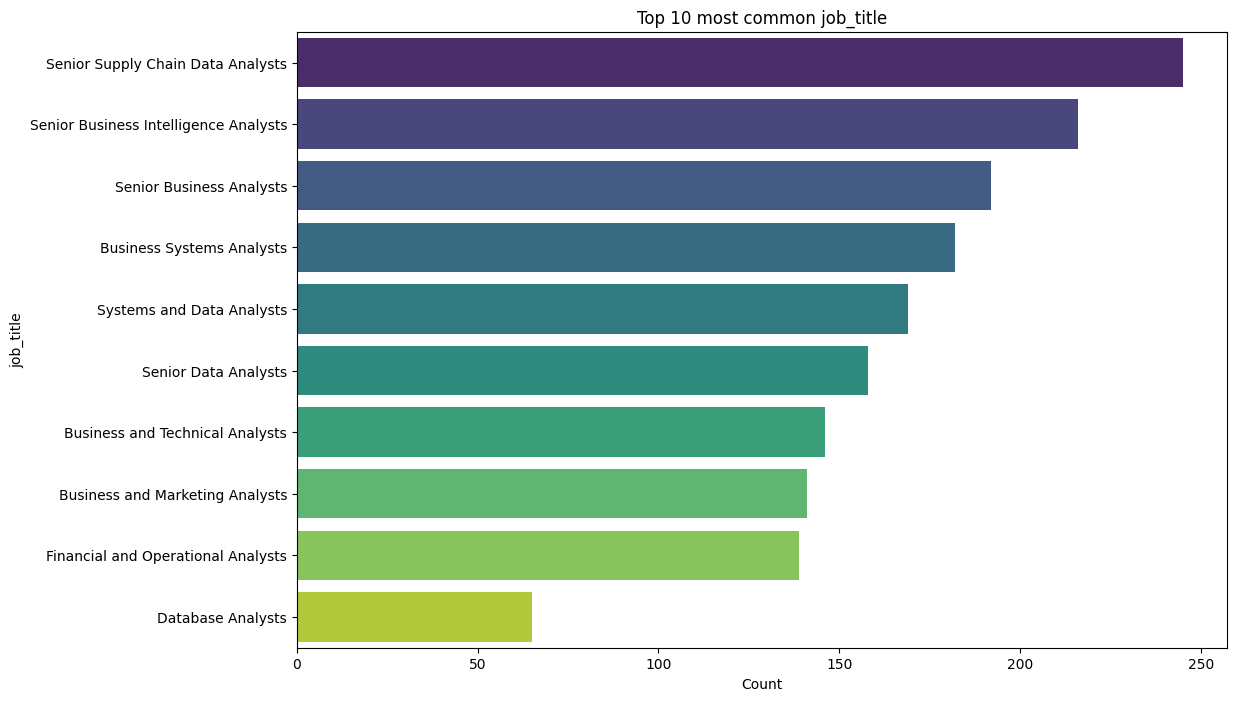

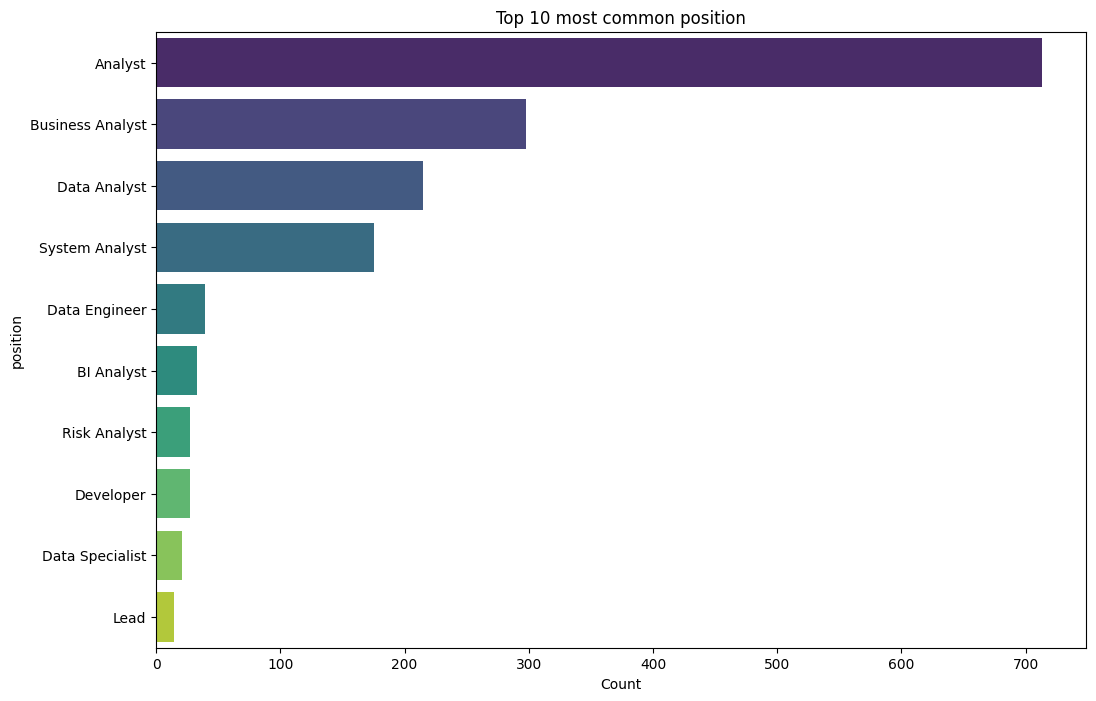

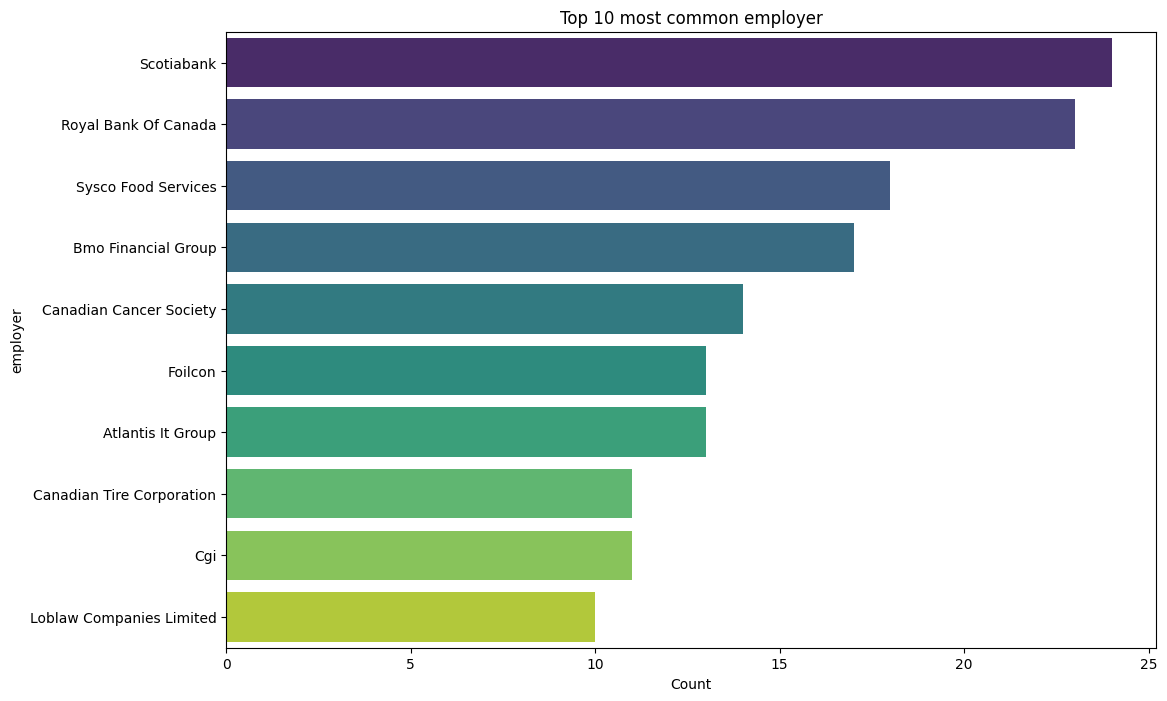

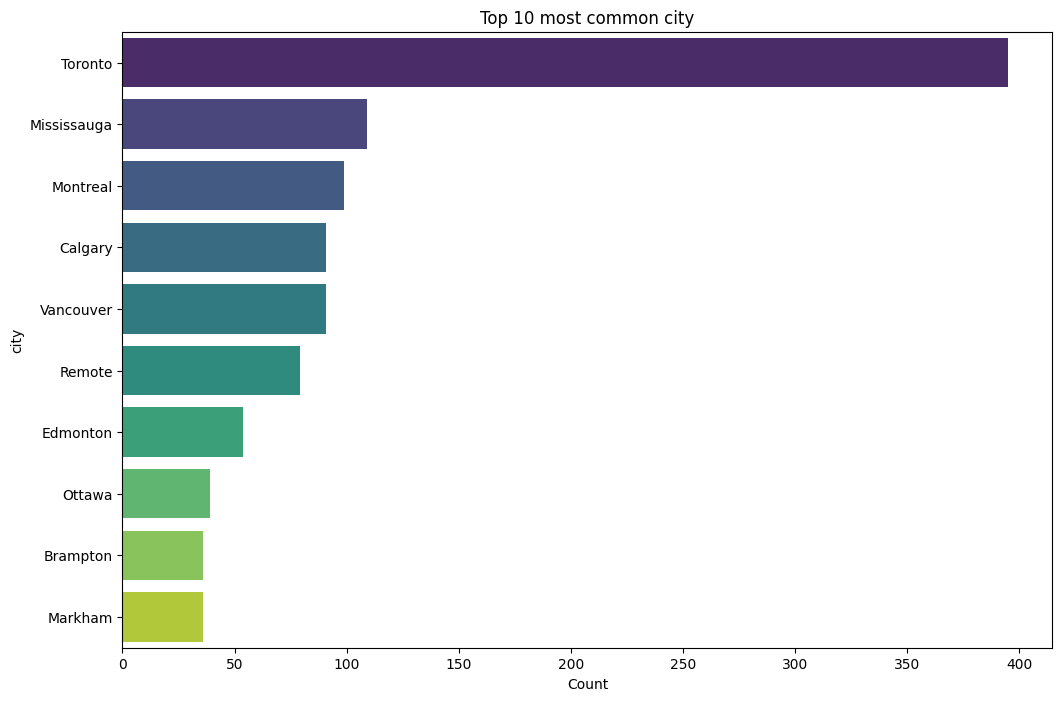

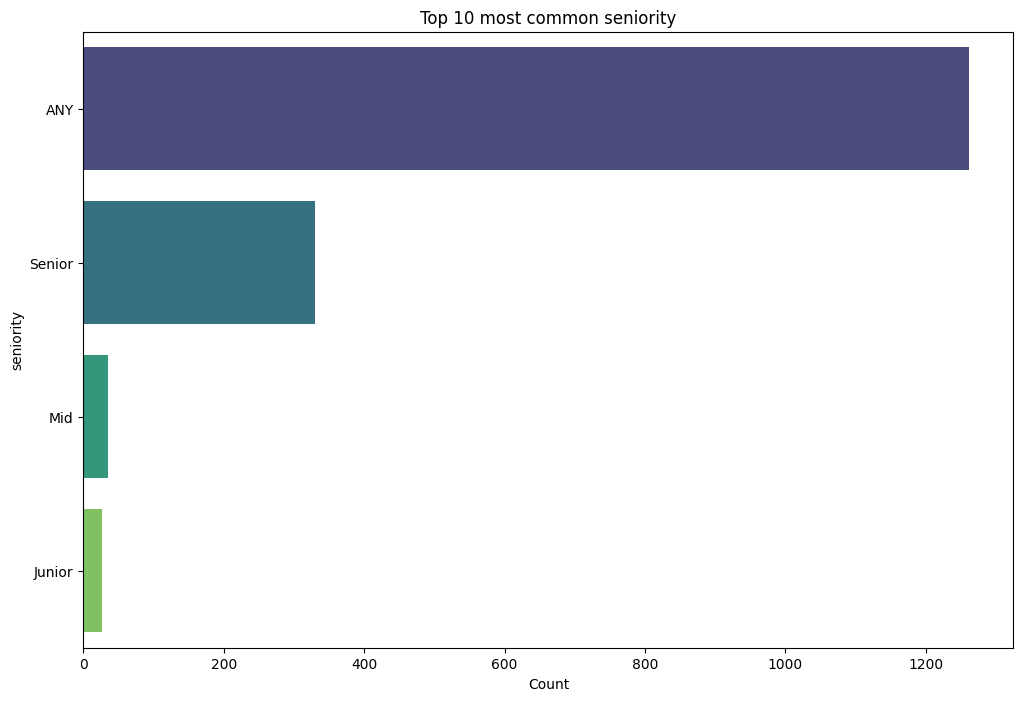

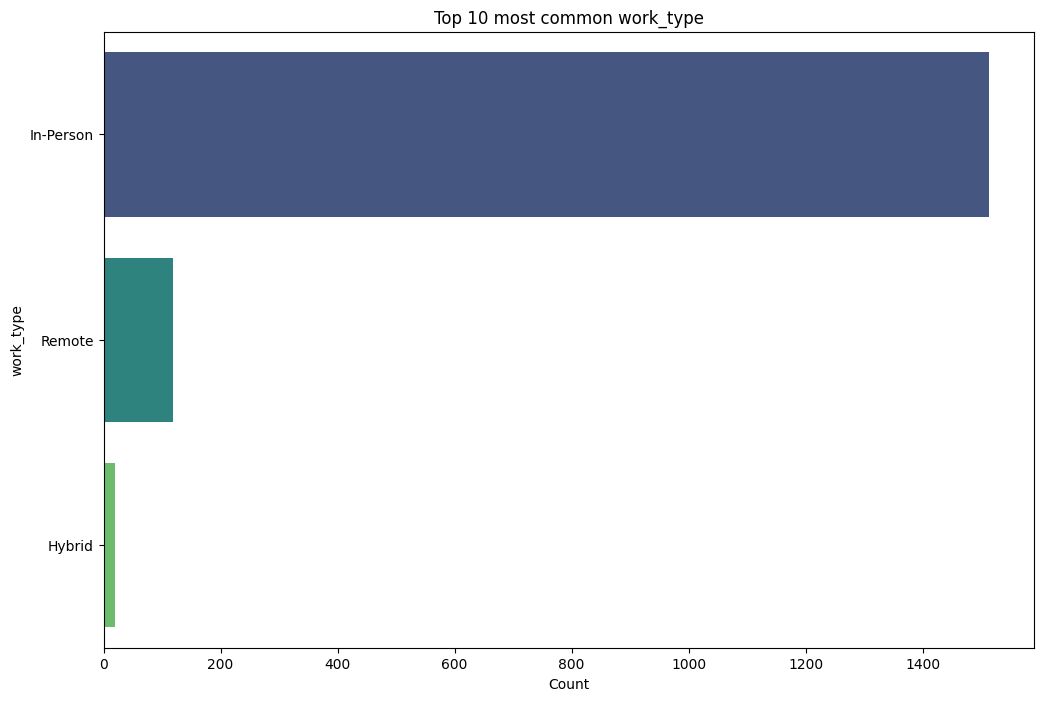

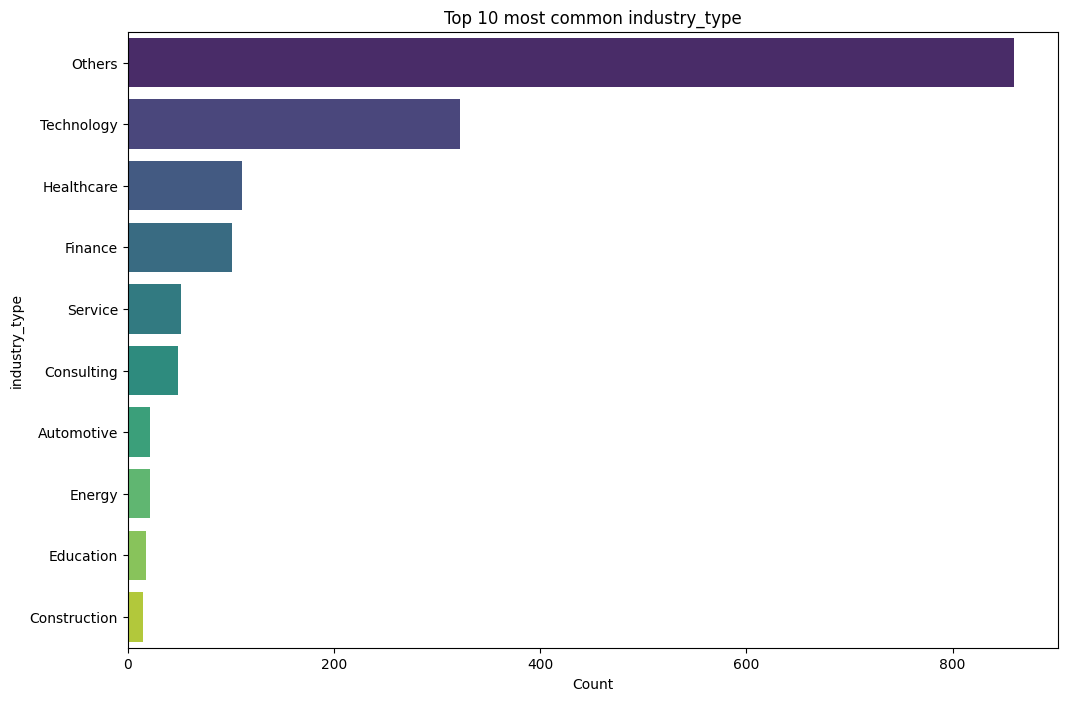

In [8]:
# Visualización de columnas categóricas
categorical_columns = ['job_title', 'position', 'employer', 'city', 'seniority', 'work_type', 'industry_type']
for col in categorical_columns:
    plot_top_n_categories(df4, col, n=10)

In [9]:
# Verificar estadísticas
df4.describe().round(2)

,min_salary,max_salary,avg_salary
count,1653.00,1653.00,1653.00
mean,69165.86,88725.79,78945.82
std,18740.06,20246.68,18045.33
min,30240.56,57200.00,43720.28
25%,60000.00,80000.00,70000.00
50%,68049.00,87000.00,77750.00
75%,80000.00,93603.00,88668.40
max,137280.00,180000.00,158640.00


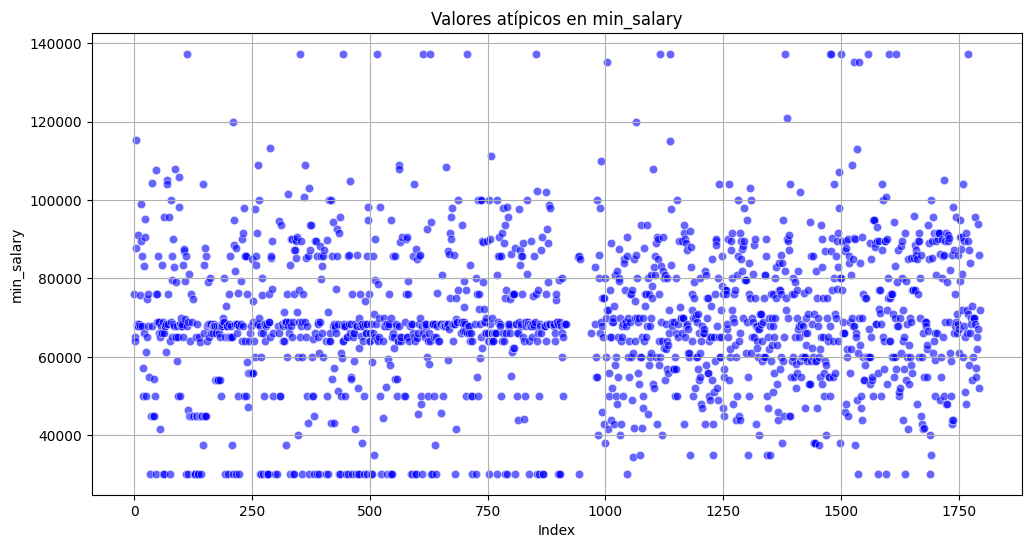

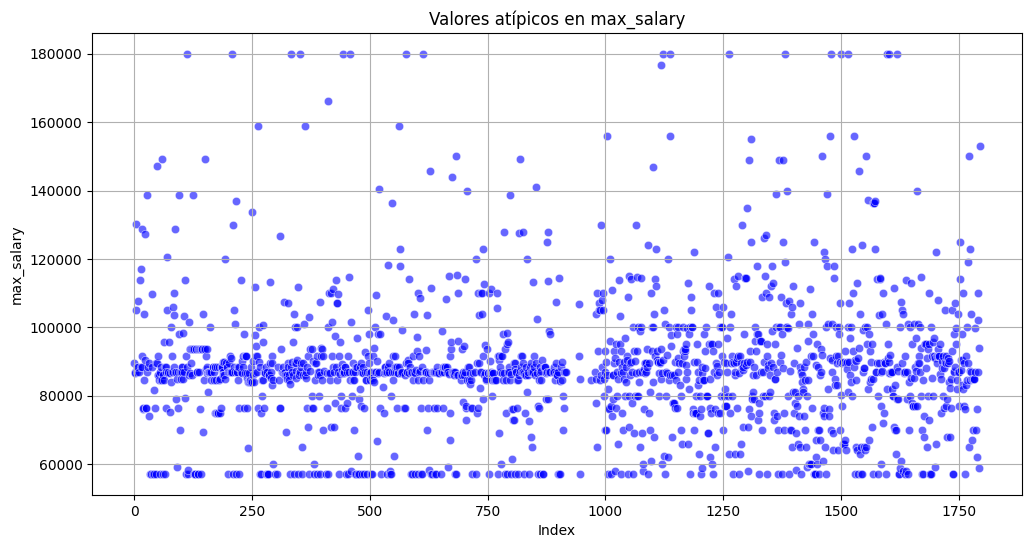

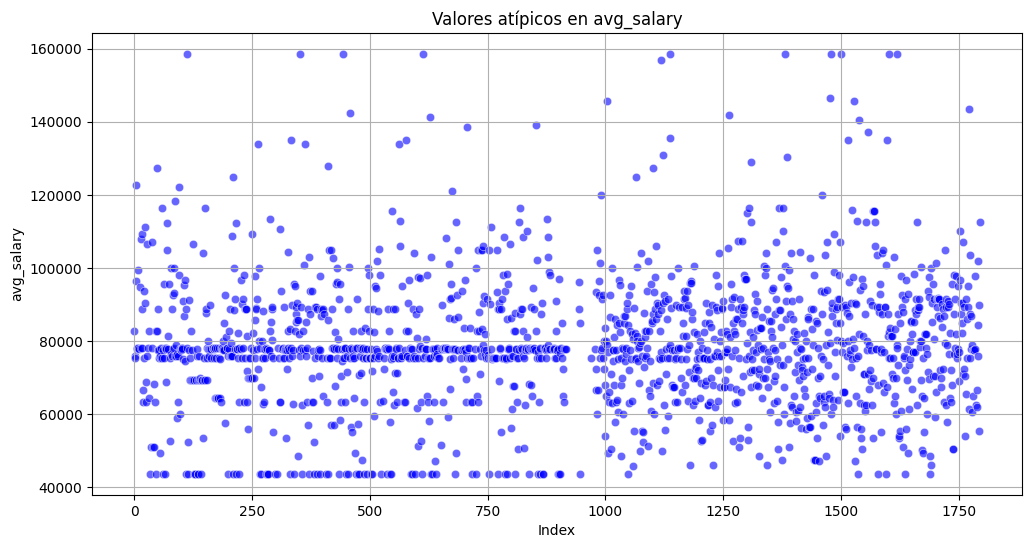

In [10]:
# Visualización de columnas numéricas (buscar outliers)
numeric_columns4 = ['min_salary', 'max_salary', 'avg_salary']
for col in numeric_columns4:
    plot_outliers(df4, col, title=f'Valores atípicos en {col}')

In [11]:
df4.head()

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, Llc",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"Business Intelligence Specialist, Ft",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000


In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1653 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_title      1653 non-null   object 
 1   job_info       1653 non-null   object 
 2   position       1653 non-null   object 
 3   employer       1653 non-null   object 
 4   city           1653 non-null   object 
 5   province       1653 non-null   object 
 6   skill          1653 non-null   object 
 7   seniority      1653 non-null   object 
 8   work_type      1653 non-null   object 
 9   industry_type  1653 non-null   object 
 10  min_salary     1653 non-null   float64
 11  max_salary     1653 non-null   float64
 12  avg_salary     1653 non-null   float64
dtypes: float64(3), object(10)
memory usage: 180.8+ KB


In [13]:
df4['skill'].to_csv('keywords.csv')

# **Dataset 5: Cost of living US**

In [14]:
# Carga del dataset
# Descargarlo desde https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties?resource=download
df5 = pd.read_csv(r'/Users/samanthaestudillo/Documents/No Country/c20-67/c20-67-m-data-bi/ETL_EDA/datasets/cost_of_living_us.csv')
df5.head().round(2)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.73,3454.92,10829.17,5737.48,4333.81,0.00,6392.95,39254.05,73010.41
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50,5091.71,11588.19,8659.56,6217.46,6147.83,7422.08,57194.33,73010.41
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50,7460.20,12361.78,11581.63,7075.66,15824.69,9769.56,76141.03,73010.41
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15,9952.24,13452.19,14503.71,9134.36,18802.19,13101.70,94203.53,73010.41
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15,12182.21,13744.60,17425.79,9942.36,18802.19,13469.22,100823.52,73010.41


In [15]:
# Estandarizar nombres de columnas 
df5 = clean_column_names(df5)

# Renombrar algunas columnas
df5 = df5.rename(columns={
    'ismetro':'is_metro',
    'areaname':'area_name',
})

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   is_metro                31430 non-null  bool   
 3   area_name               31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [16]:
# Verificar valores nulos y duplicados
df5_ndr = null_duplicates_review(df5, 'Dataset US Cost of Living')

Valores ausentes en Dataset US Cost of Living:
                        Valores ausentes (%)
case_id                                 0.00
state                                   0.00
is_metro                                0.00
area_name                               0.00
county                                  0.00
family_member_count                     0.00
housing_cost                            0.00
food_cost                               0.00
transportation_cost                     0.00
healthcare_cost                         0.00
other_necessities_cost                  0.00
childcare_cost                          0.00
taxes                                   0.00
total_cost                              0.00
median_family_income                    0.03

Total duplicados en Dataset US Cost of Living: 0



In [17]:
null_rows = df5.loc[df5['median_family_income'].isna()]
null_rows

,case_id,state,is_metro,area_name,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
15110,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p0c,8052.0,3019.16160,11086.4934,6505.34988,4011.51852,0.00000,6075.80856,38750.3316,NaN
15111,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p1c,11256.0,4449.51084,11722.2708,9930.74856,5690.72604,7555.66332,7196.82420,57801.7440,NaN
15112,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p2c,11256.0,6519.27612,12405.8652,13356.14640,6440.68356,14323.03800,8732.72244,73033.7340,NaN
15113,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p3c,14688.0,8697.00216,12854.8620,16781.54400,8473.30884,16405.30800,11755.84356,89655.8676,NaN
15114,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p4c,14688.0,10645.71900,13619.9388,20206.94280,9179.40600,16405.30800,12372.99120,97118.3088,NaN
15115,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p0c,8772.0,5535.13032,12918.5988,13010.70000,5184.03768,0.00000,7023.17208,52443.6384,NaN
15116,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p1c,11256.0,6889.02612,13557.9828,16436.09760,6574.65816,7555.66332,8939.94504,71209.3716,NaN
15117,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p2c,11256.0,8724.80352,13977.7980,19861.49760,7239.83280,14323.03800,9841.96872,85224.9372,NaN
15118,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p3c,14688.0,10652.32248,14798.7552,23286.89520,9181.79808,16405.30800,11854.97676,100868.0508,NaN
15119,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p4c,14688.0,13035.88920,14802.7416,26712.29280,10045.45896,16405.30800,12050.91480,107740.6056,NaN


In [18]:
rows_view = df5.iloc[15100:15129]
rows_view

,case_id,state,is_metro,area_name,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
15100,1532,MO,False,"Crawford County, MO",Crawford County,1p0c,5724.0,3019.16160,11086.49340,6618.69000,3167.99232,0.00000,5293.36704,34909.7052,54524.464844
15101,1532,MO,False,"Crawford County, MO",Crawford County,1p1c,7944.0,4449.51084,11722.27080,9857.27784,4490.65800,4734.89172,5192.87508,48391.4856,54524.464844
15102,1532,MO,False,"Crawford County, MO",Crawford County,1p2c,7944.0,6519.27612,12405.86520,13095.86760,5240.61516,9020.05296,5489.89452,59715.5748,54524.464844
15103,1532,MO,False,"Crawford County, MO",Crawford County,1p3c,10872.0,8697.00216,12854.86200,16334.45520,7090.62156,10338.56472,7165.93728,73353.4452,54524.464844
15104,1532,MO,False,"Crawford County, MO",Crawford County,1p4c,10872.0,10645.71900,13619.93880,19573.04280,7796.71872,10338.56472,7216.03128,80062.0140,54524.464844
15105,1532,MO,False,"Crawford County, MO",Crawford County,2p0c,6492.0,5535.13032,12918.59880,13237.38000,4357.90356,0.00000,6277.71900,48818.7300,54524.464844
15106,1532,MO,False,"Crawford County, MO",Crawford County,2p1c,7944.0,6889.02612,13557.98280,16475.96760,5374.59012,4734.89172,6987.91404,61964.3736,54524.464844
15107,1532,MO,False,"Crawford County, MO",Crawford County,2p2c,7944.0,8724.80352,13977.79800,19714.55520,6039.76464,9020.05296,7128.28932,72549.2640,54524.464844
15108,1532,MO,False,"Crawford County, MO",Crawford County,2p3c,10872.0,10652.32248,14798.75520,22953.14520,7799.11080,10338.56472,8313.12528,85727.0220,54524.464844
15109,1532,MO,False,"Crawford County, MO",Crawford County,2p4c,10872.0,13035.88920,14802.74160,26191.73400,8662.77096,10338.56472,7962.63276,91866.3336,54524.464844


In [19]:
df5 = df5.dropna(subset=['median_family_income'])

In [20]:
# Verificar estadísticas  
df5.describe().round(2)

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
count,31420.00,31420.00,31420.00,31420.00,31420.00,31420.00,31420.00,31420.00,31420.00,31420.00
mean,1589.33,11073.36,8287.65,13593.99,13393.01,7015.26,9879.25,7657.10,70899.62,68316.00
std,917.36,4166.01,3271.23,1640.57,5204.02,2397.56,6778.33,3339.91,21846.34,16886.97
min,1.00,4209.31,2220.28,2216.46,3476.38,2611.64,0.00,1027.80,30087.66,25529.98
25%,792.00,8580.00,5801.42,12535.20,9667.44,5286.34,5341.21,5597.54,53773.91,57223.99
50%,1593.50,10416.00,8129.16,13698.32,13082.51,6733.06,10166.34,6897.75,70974.25,65955.61
75%,2386.00,12444.00,10703.62,14765.87,16657.82,8412.60,14272.14,8789.14,85368.05,76136.07
max,3171.00,61735.59,31178.62,19816.48,37252.27,28829.44,48831.09,47753.39,223717.55,177662.47


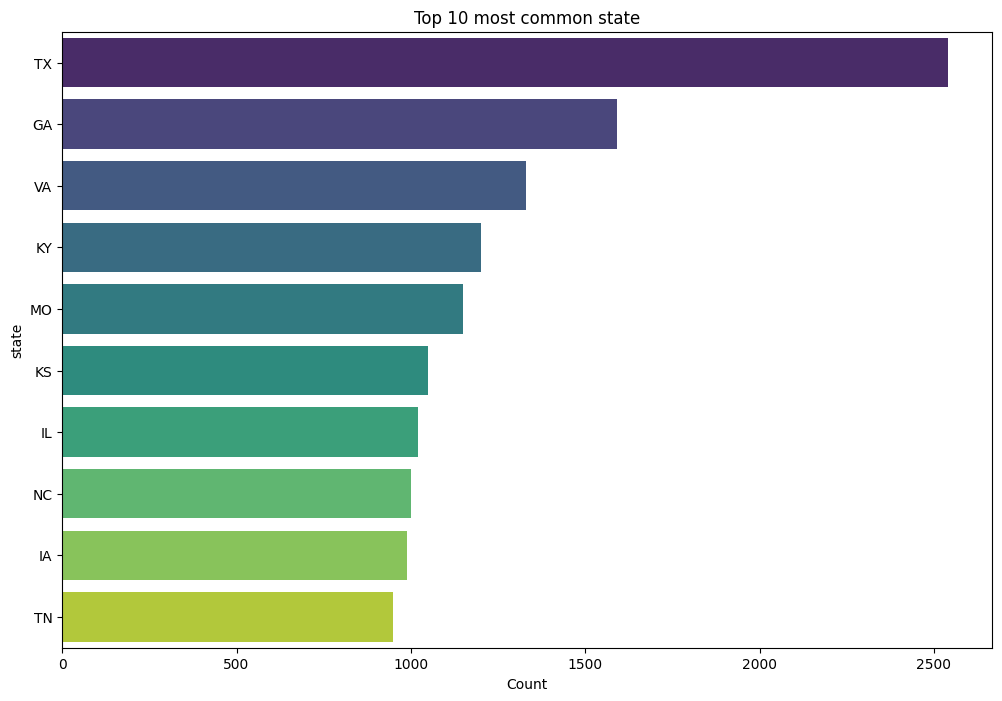

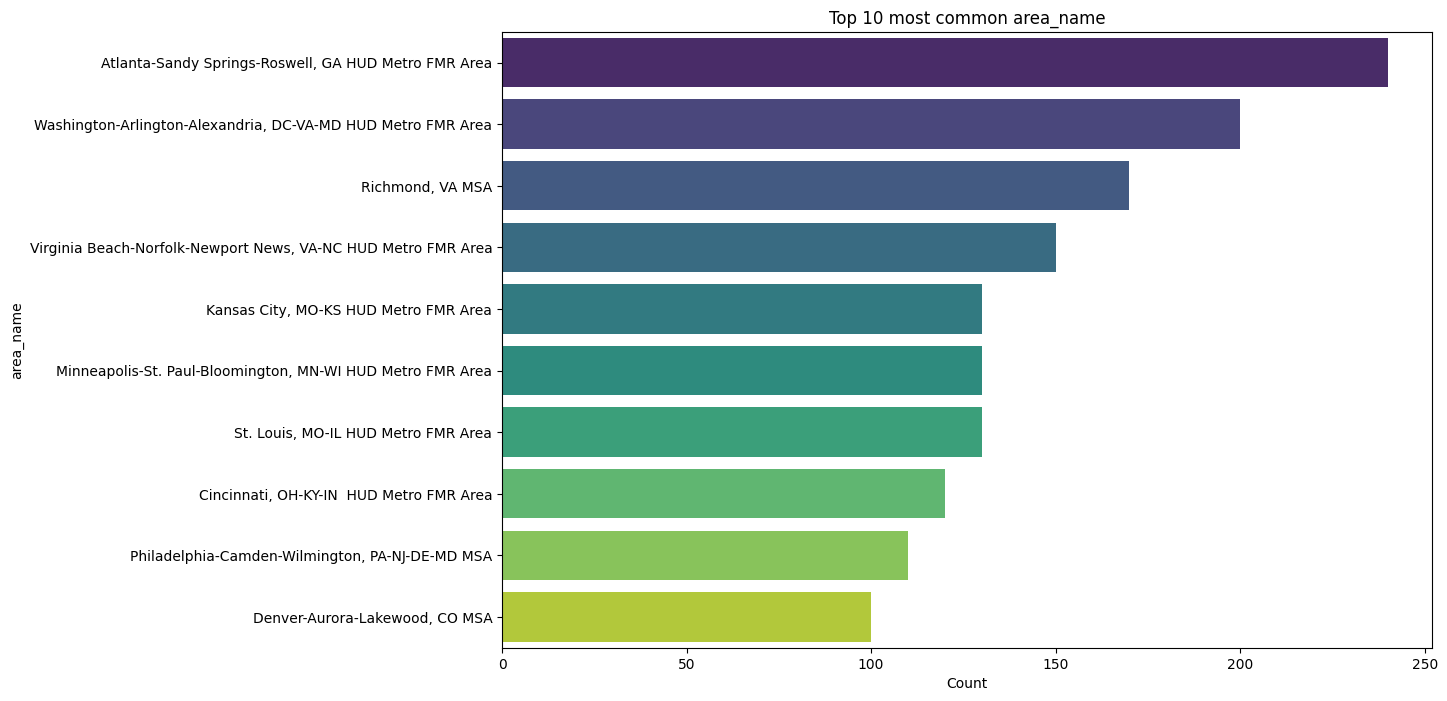

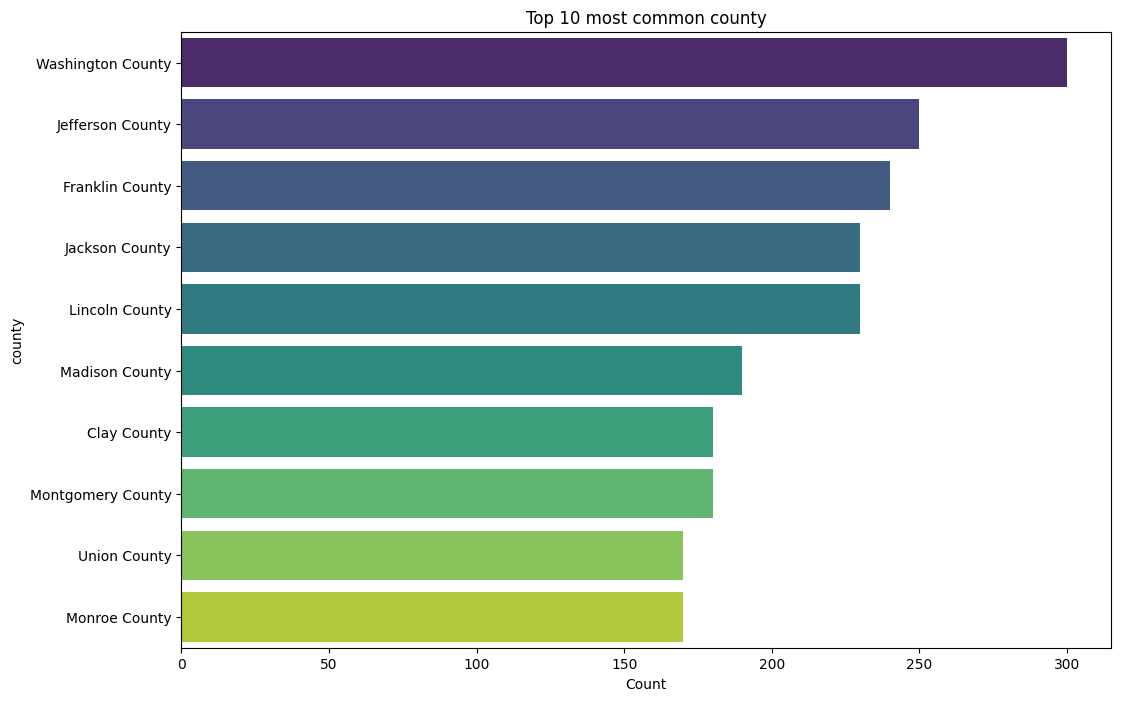

In [21]:
# Visualización de columnas categóricas
categorical_columns = ['state', 'area_name', 'county']
for col in categorical_columns:
    plot_top_n_categories(df5, col, n=10)

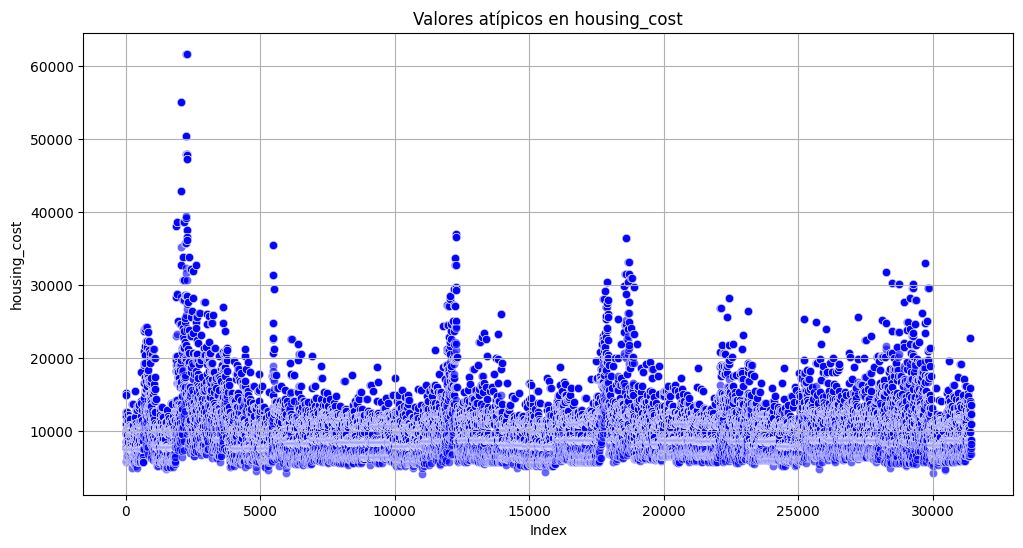

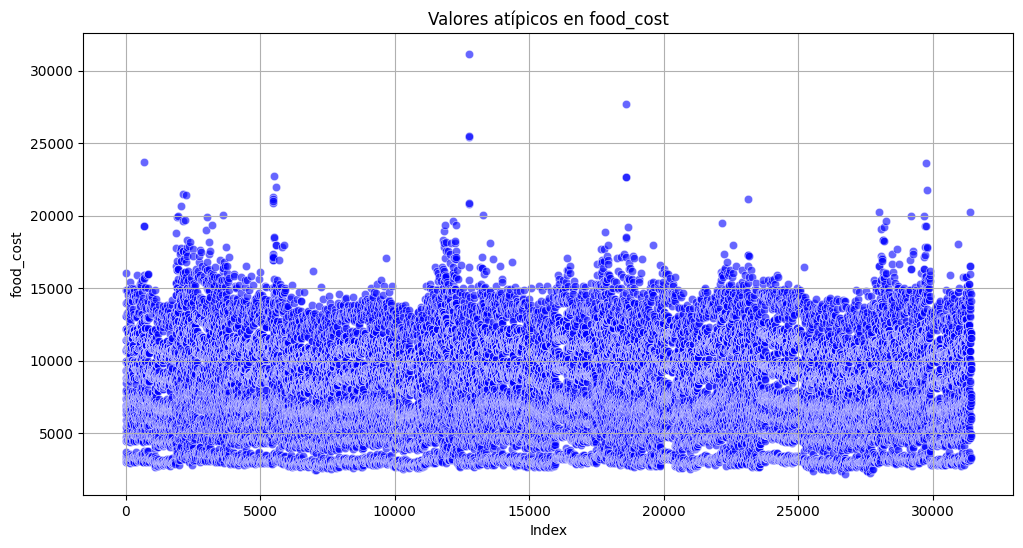

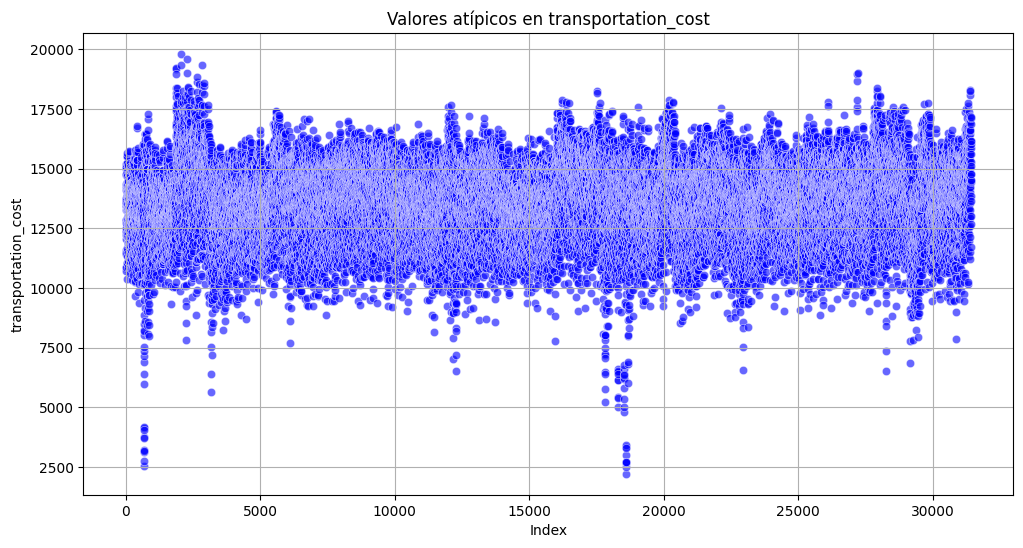

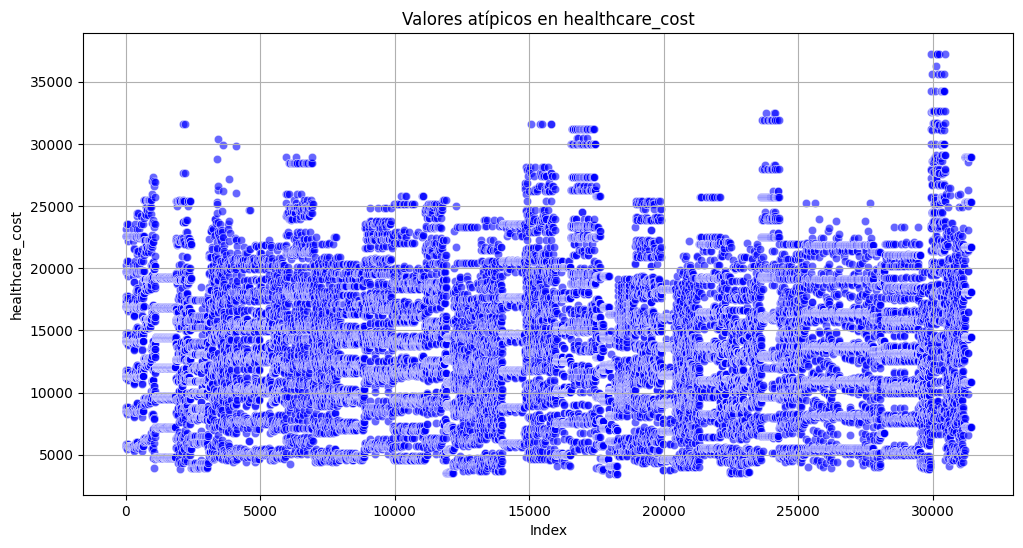

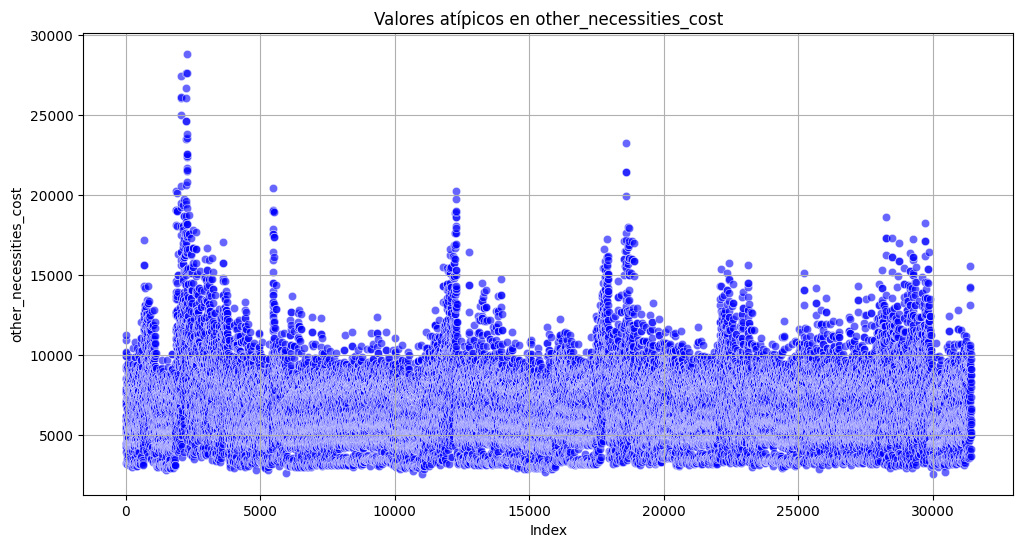

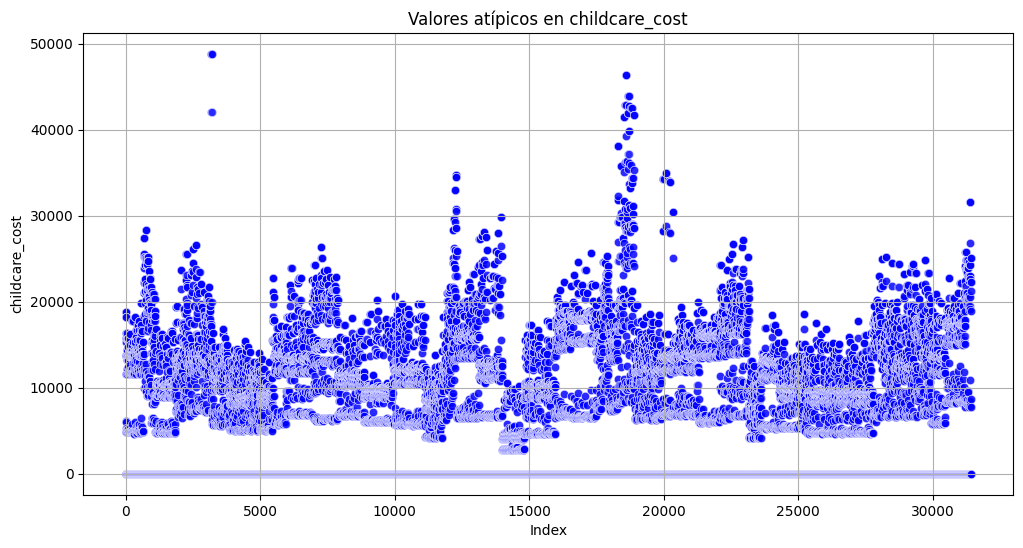

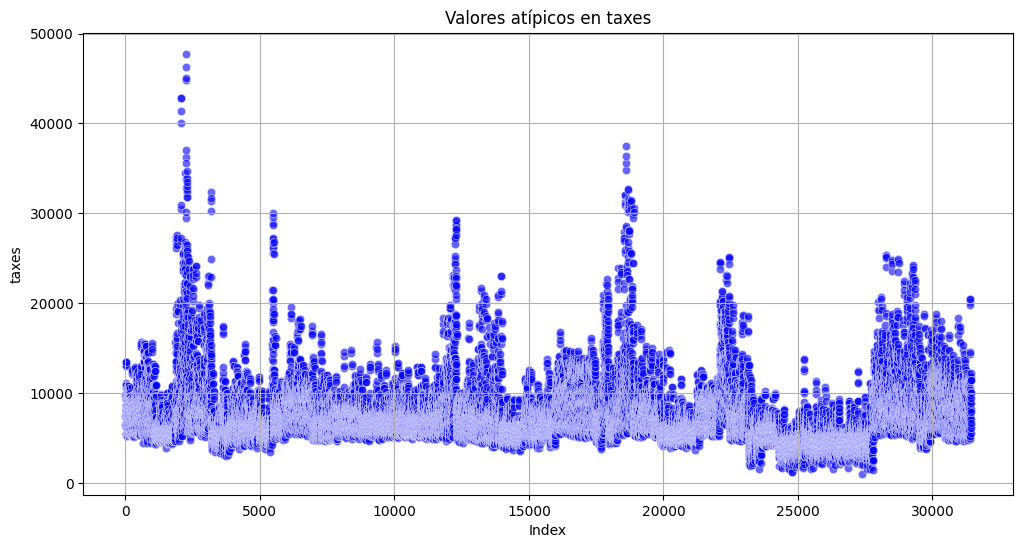

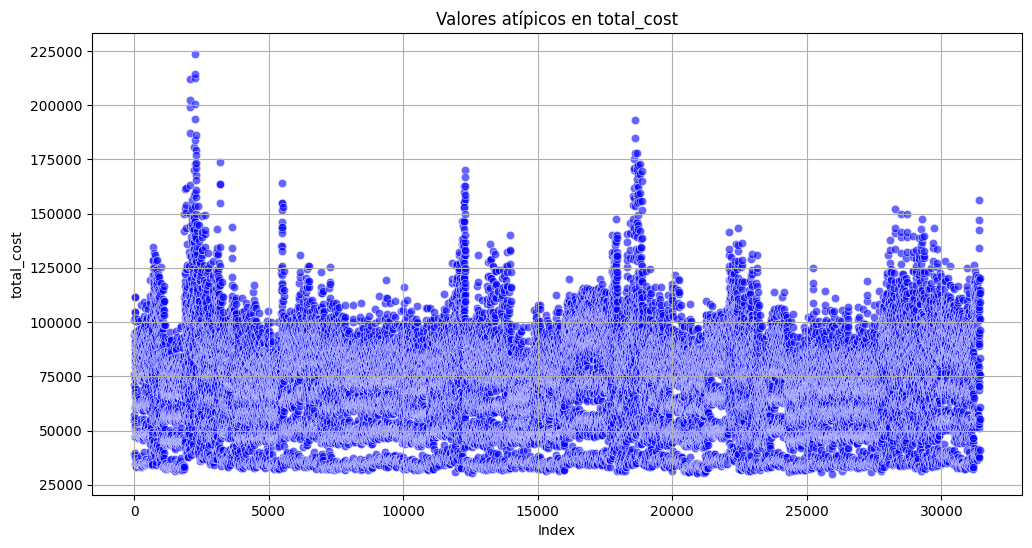

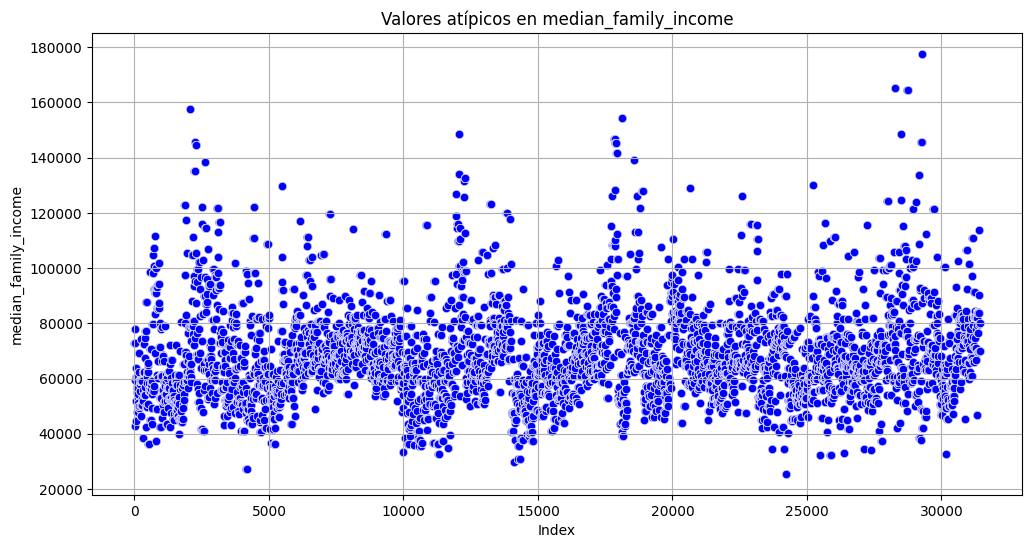

In [22]:
# Visualización de columnas numéricas (buscar outliers)
numeric_columns = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost',	'taxes', 'total_cost',	'median_family_income']
for col in numeric_columns:
    plot_outliers(df5, col, title=f'Valores atípicos en {col}')

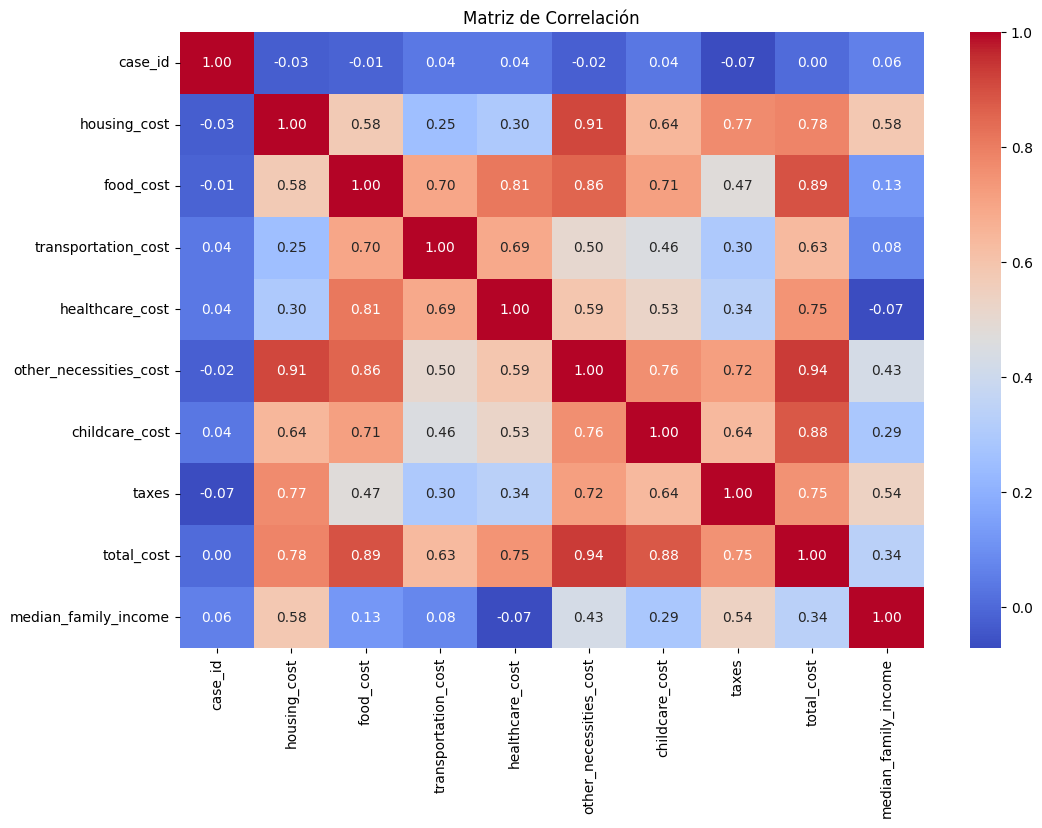

In [23]:
df5_numeric = df5.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df5_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [24]:
df5.head()

,case_id,state,is_metro,area_name,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [26]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31420 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31420 non-null  int64  
 1   state                   31420 non-null  object 
 2   is_metro                31420 non-null  bool   
 3   area_name               31420 non-null  object 
 4   county                  31420 non-null  object 
 5   family_member_count     31420 non-null  object 
 6   housing_cost            31420 non-null  float64
 7   food_cost               31420 non-null  float64
 8   transportation_cost     31420 non-null  float64
 9   healthcare_cost         31420 non-null  float64
 10  other_necessities_cost  31420 non-null  float64
 11  childcare_cost          31420 non-null  float64
 12  taxes                   31420 non-null  float64
 13  total_cost              31420 non-null  float64
 14  median_family_income    31420 non-null  flo